In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:\DL\Jose portila Dl\TF_2_Notebooks_and_Data\DATA\lending_club_loan_two.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [6]:
df['emp_title'].nunique()

173105

In [7]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

<AxesSubplot:xlabel='emp_length', ylabel='annual_inc'>

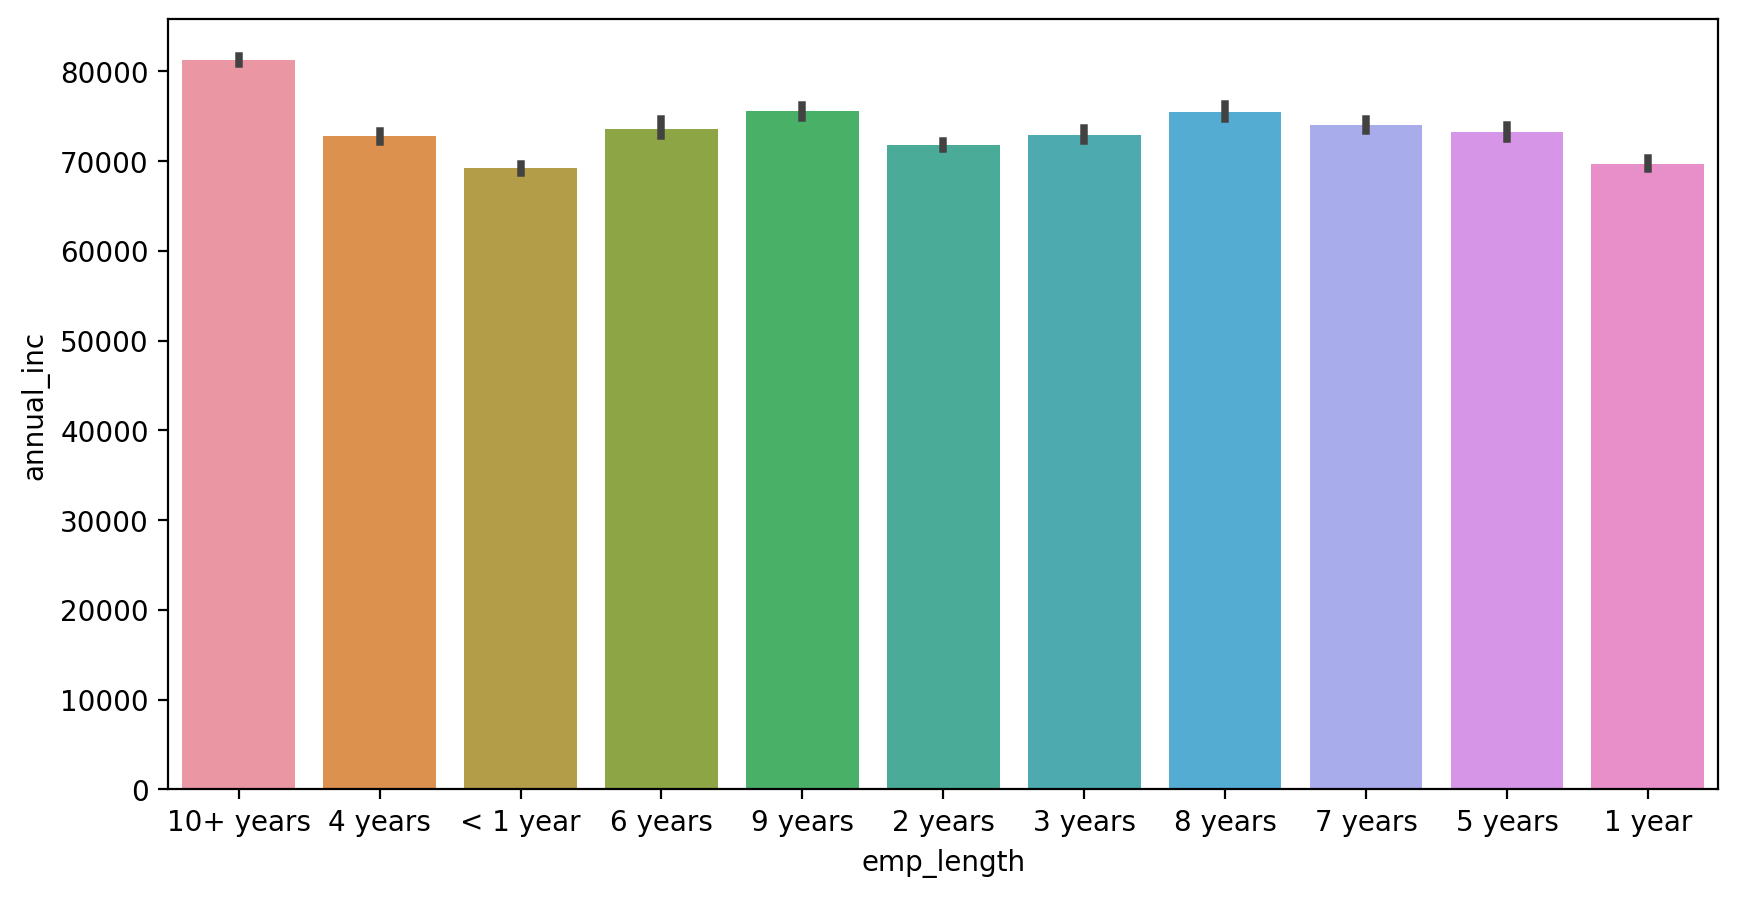

In [8]:
plt.figure(figsize=(10,5) ,dpi =200)
sns.barplot(x = 'emp_length' , y = 'annual_inc' , data =df)

<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

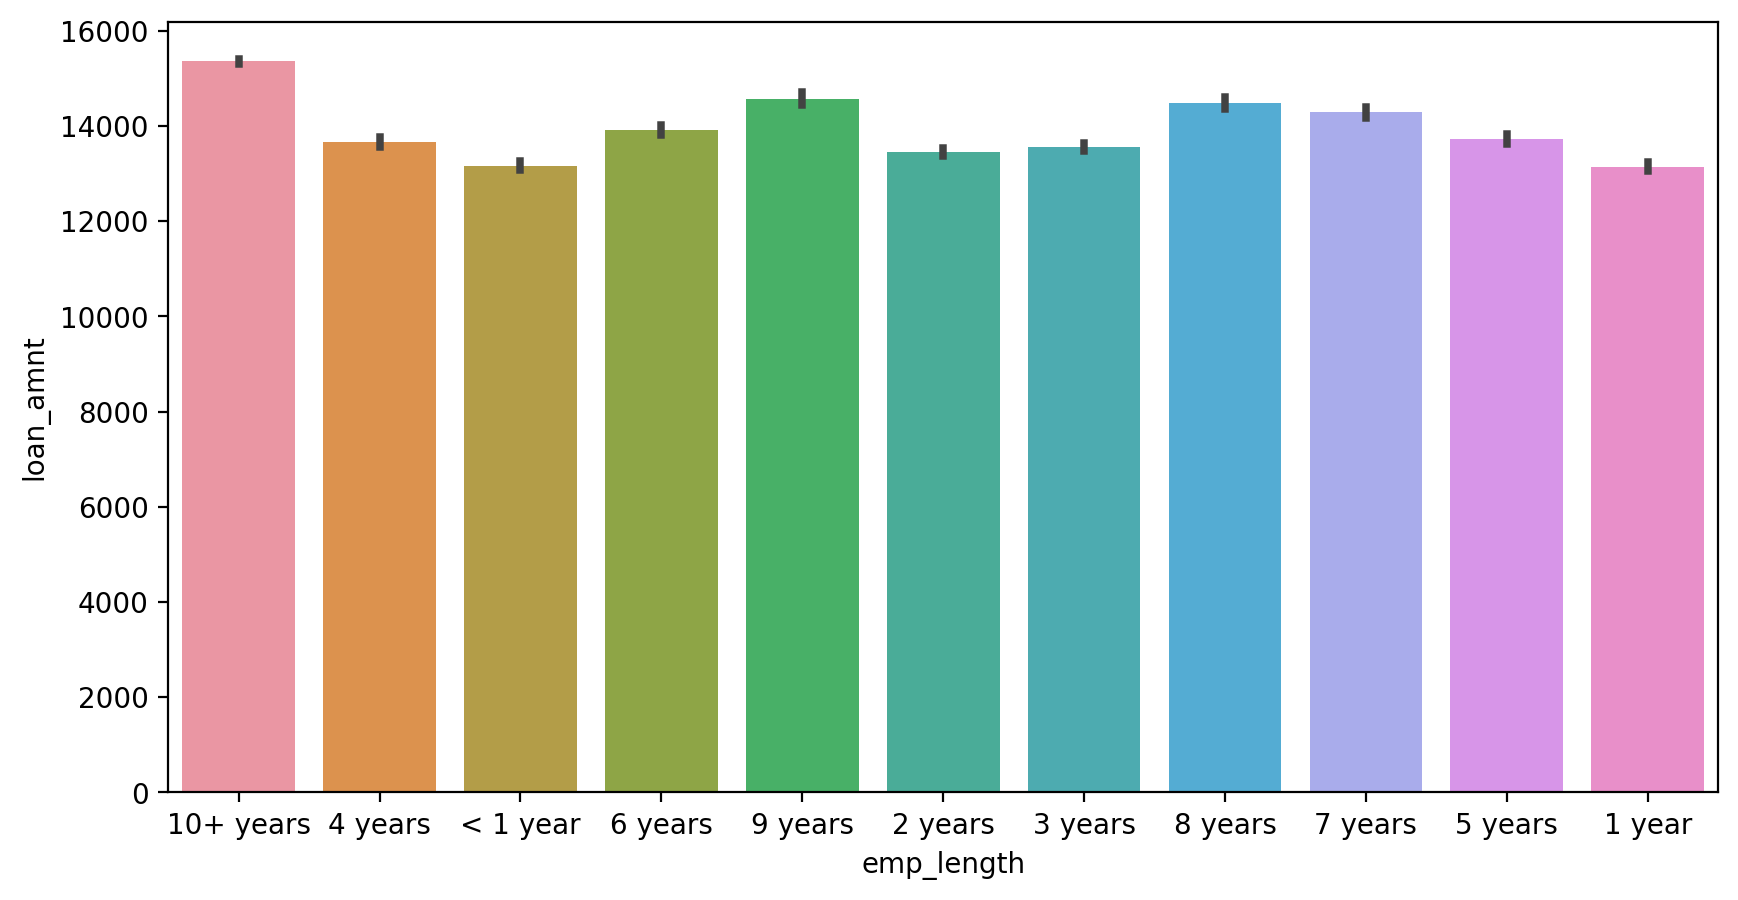

In [9]:
plt.figure(figsize=(10,5) ,dpi =200)
sns.barplot(x = 'emp_length' , y = 'loan_amnt' , data =df)

In [10]:
df['title']

0                        Vacation
1              Debt consolidation
2         Credit card refinancing
3         Credit card refinancing
4           Credit Card Refinance
                   ...           
396025         Debt consolidation
396026         Debt consolidation
396027       pay off credit cards
396028              Loanforpayoff
396029          Toxic Debt Payoff
Name: title, Length: 396030, dtype: object

In [11]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [12]:
loan = pd.get_dummies(data =df['loan_status'] , drop_first=True)

In [13]:
loan

,Fully Paid
0,1
1,1
2,1
3,1
4,0
...,...
396025,1
396026,1
396027,1
396028,1


In [14]:
df_new = pd.concat([df , loan] , axis=1)

In [15]:
df_new = df_new.drop(['loan_status'], axis =1)

In [16]:
df_new = df_new.rename(columns={'Fully Paid':'loan_status'})

In [17]:
df_new

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [18]:
df_new.corr()['loan_status'].sort_values()

int_rate               -0.247758
revol_util             -0.082373
dti                    -0.062413
loan_amnt              -0.059836
installment            -0.041082
open_acc               -0.028012
pub_rec                -0.019933
pub_rec_bankruptcies   -0.009383
revol_bal               0.010892
total_acc               0.017893
annual_inc              0.053432
mort_acc                0.073111
loan_status             1.000000
Name: loan_status, dtype: float64

In [19]:
df_new = df_new.drop(['emp_title'] , axis =1)

In [20]:
df_new.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_status                 0
dtype: int64

In [21]:
df_new = df_new.drop(['emp_length','title'] , axis=1)

In [22]:
df_new['mort_acc'].sort_values(ascending=False)

10208     34.0
323429    32.0
33814     32.0
226908    31.0
132453    31.0
          ... 
395991     NaN
395995     NaN
396016     NaN
396021     NaN
396029     NaN
Name: mort_acc, Length: 396030, dtype: float64

<AxesSubplot:xlabel='mort_acc', ylabel='int_rate'>

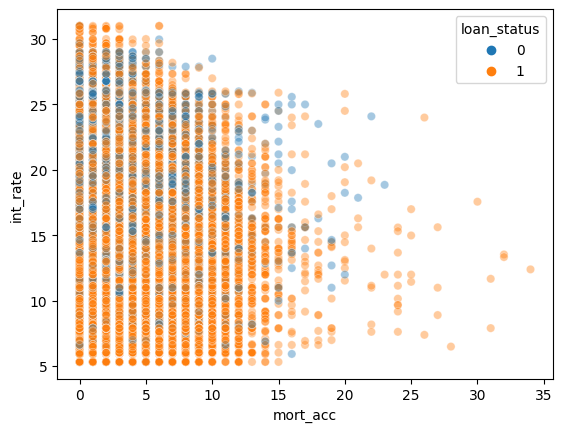

In [23]:
sns.scatterplot(x = 'mort_acc' , y = 'int_rate' , data = df_new , hue = 'loan_status' , alpha=0.4)

In [24]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [25]:
df_new['total_acc'].sort_values(ascending=False)

105682    151.0
123703    150.0
53317     135.0
82628     129.0
96571     124.0
          ...  
242957      2.0
324747      2.0
77483       2.0
199313      2.0
310335      2.0
Name: total_acc, Length: 396030, dtype: float64

<AxesSubplot:xlabel='mort_acc', ylabel='total_acc'>

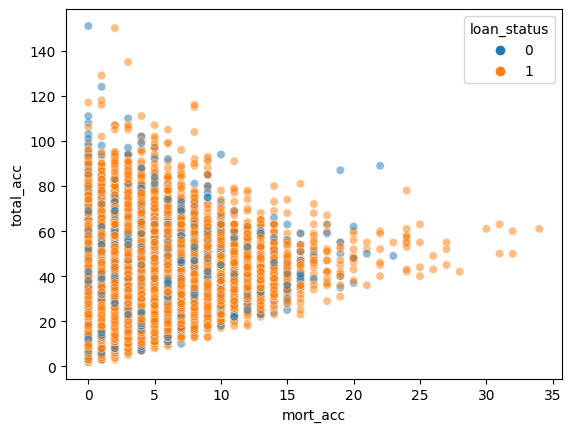

In [26]:
sns.scatterplot(x= 'mort_acc', y = 'total_acc' , data = df_new , hue = 'loan_status',alpha = 0.5)

<AxesSubplot:xlabel='mort_acc', ylabel='annual_inc'>

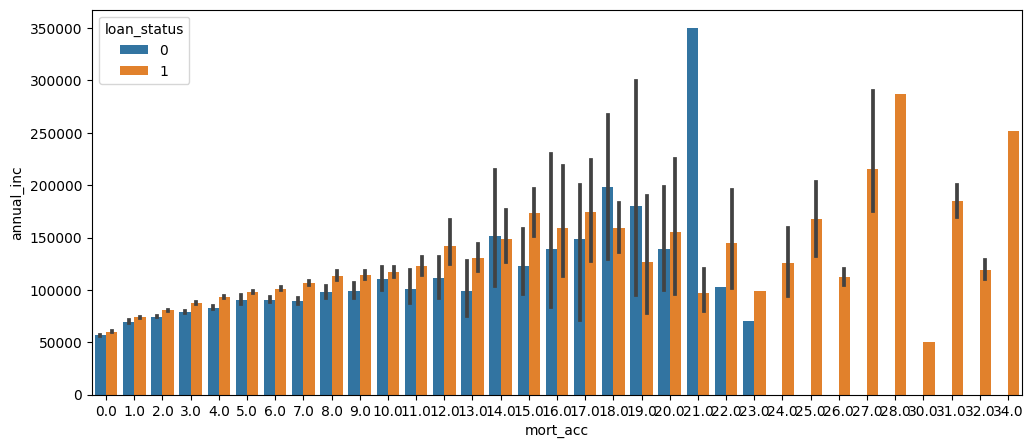

In [27]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'mort_acc', y = 'annual_inc' , data = df_new , hue = 'loan_status')

In [28]:
mort_mean = df_new.groupby('total_acc').mean()['mort_acc']
mort_mean

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [29]:
def mort():
    if df_new['annual_inc'] >200000 & df_new['loan_status'] == 1:
        df['mort_acc'].fillna(28)
       
    elif df_new['annual_inc'] >300000 & df_new['loan_status'] == 0:  
        df['mort_acc'].fillna(21)
        
    else:
        df['mort_acc'].fillna(df['mort_acc'].mean())
        

In [30]:
df_new['mort_acc'].isnull().sum()

37795

In [31]:
df_new[(df_new['annual_inc'] >200000) & (df_new['loan_status'] == 1)]['mort_acc'].value_counts()

3.0     828
2.0     780
4.0     767
0.0     678
1.0     659
5.0     600
6.0     398
7.0     292
8.0     185
9.0     101
10.0     60
11.0     40
12.0     29
14.0     17
15.0     14
13.0     14
17.0      6
16.0      5
20.0      3
18.0      3
19.0      2
34.0      1
22.0      1
28.0      1
25.0      1
24.0      1
27.0      1
Name: mort_acc, dtype: int64

<AxesSubplot:xlabel='mort_acc', ylabel='annual_inc'>

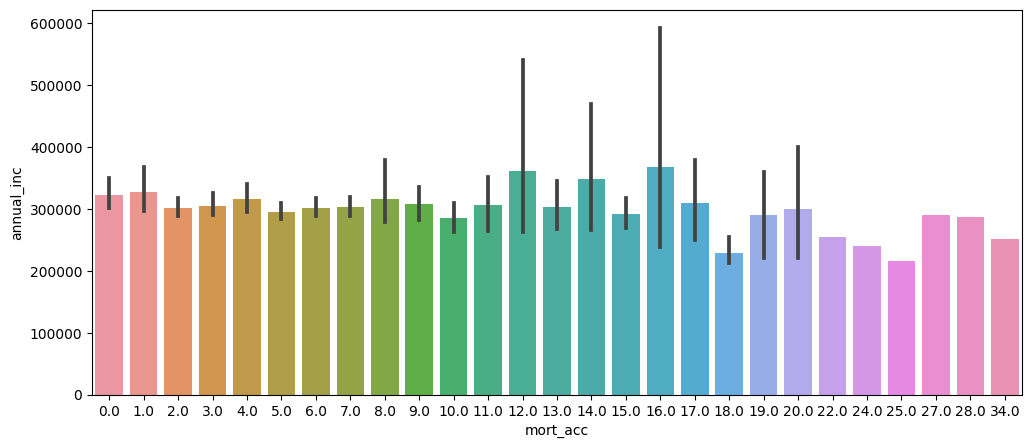

In [32]:
plt.figure(figsize = (12,5))
sns.barplot(x= 'mort_acc', y = 'annual_inc' , data = df_new[(df_new['annual_inc'] >200000) & (df_new['loan_status'] == 1)])

# Taking mean of mort_acc wrt total_acc

In [33]:
total_acc_avg = df_new.groupby('total_acc').mean()['mort_acc']

In [34]:
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [35]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [36]:
df_new['mort_acc'] = df_new.apply(lambda x : fill_mort_acc(x['total_acc'], x['mort_acc']), axis =1 )

In [37]:
df_new.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_status               0
dtype: int64

In [38]:
df_new.corr()['revol_util'].sort_values()

open_acc               -0.131420
total_acc              -0.104273
pub_rec_bankruptcies   -0.086751
loan_status            -0.082373
pub_rec                -0.075910
mort_acc                0.005821
annual_inc              0.027871
dti                     0.088375
loan_amnt               0.099911
installment             0.123915
revol_bal               0.226346
int_rate                0.293659
revol_util              1.000000
Name: revol_util, dtype: float64

In [39]:
df_new.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_status'],
      dtype='object')

<AxesSubplot:xlabel='int_rate', ylabel='revol_util'>

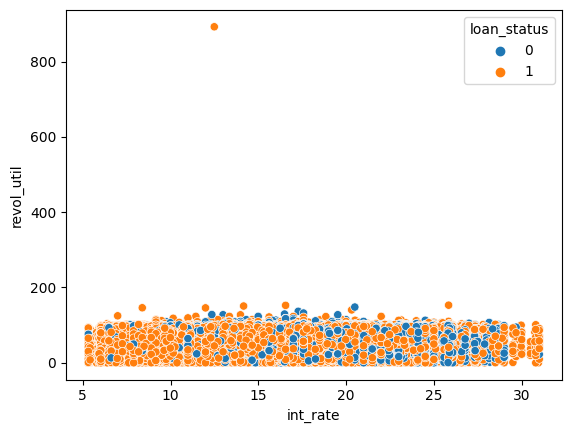

In [40]:
sns.scatterplot(y ='revol_util', x = 'int_rate', data = df_new , hue = 'loan_status')

In [41]:
df_new[df_new['revol_util'] > 400]

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
137211,3500.0,36 months,12.49,117.08,B,B4,RENT,45000.0,Verified,Apr-2014,...,0.0,2677.0,892.3,9.0,f,INDIVIDUAL,0.0,0.0,"12506 Connie Burg\r\nVelasquezfort, TN 00813",1


In [42]:
df_new.drop(137211, axis =0 , inplace = True)

In [43]:
df_new.shape

(396029, 24)

In [44]:
df_new['revol_util'].mean()

53.78962987014628

In [45]:
df_new['revol_util'].fillna(54 , axis = 0 , inplace = True)
df_new.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_status               0
dtype: int64

In [46]:
df_new.corr()['pub_rec_bankruptcies'].sort_values()

revol_bal              -0.124533
loan_amnt              -0.106540
installment            -0.098629
revol_util             -0.086846
annual_inc             -0.050163
open_acc               -0.027734
dti                    -0.014558
loan_status            -0.009382
mort_acc                0.029276
total_acc               0.042034
int_rate                0.057450
pub_rec                 0.699408
pub_rec_bankruptcies    1.000000
Name: pub_rec_bankruptcies, dtype: float64

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='pub_rec'>

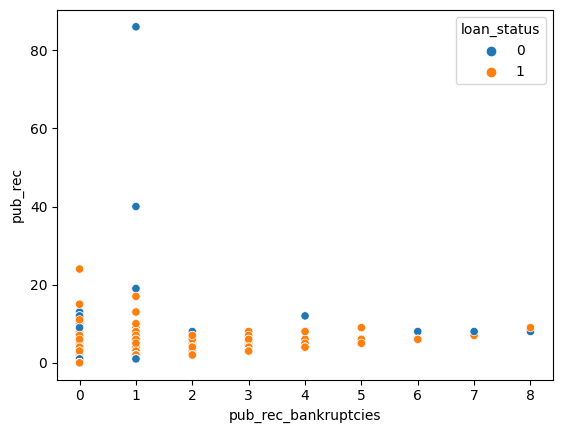

In [47]:
sns.scatterplot(x ='pub_rec_bankruptcies', y = 'pub_rec', data = df_new , hue = 'loan_status')

In [48]:
df_new = df_new.dropna()

In [49]:
df_new.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_status             0
dtype: int64

In [50]:
df_new.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
loan_status               uint8
dtype: object

In [51]:
df_new

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [52]:
df_new.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [53]:
df_new['term'].value_counts()

 36 months    301469
 60 months     94025
Name: term, dtype: int64

In [54]:
def transform(term):
    return int(term[:3])
    

In [55]:
df_new['term'] =  df_new['term'].map(transform)

In [56]:
df_new['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395494, dtype: int64

In [57]:
df_new

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [58]:
df_new.select_dtypes(['object']).columns

Index(['grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

## Since grade and sub_grade represents same so drop grade 

In [59]:
df_new = df_new.drop('grade' ,axis=1)

In [64]:
sub_grade = pd.get_dummies(df_new['sub_grade'] , drop_first=True)

In [65]:
df_new

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,debt_consolidation,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,debt_consolidation,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,debt_consolidation,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,debt_consolidation,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [68]:
df_new = pd.concat([df_new , sub_grade] , axis =1)

In [72]:
df_new = df_new.drop('sub_grade' , axis =1)

In [73]:
df_new.select_dtypes(object).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

In [79]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [81]:
dummies = pd.get_dummies(df_new[['verification_status','purpose','application_type','initial_list_status']] , drop_first=True)

In [86]:
df_new = pd.concat([df_new , dummies] , axis =1)

In [89]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [90]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'] , "OTHER")

In [91]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [93]:
home_dummies = pd.get_dummies(df_new['home_ownership'] , drop_first=True)

In [94]:
df_new = pd.concat([df_new , home_dummies] , axis = 1)

In [96]:
df_new = df_new.drop('home_ownership' , axis =1)

# extracting zipcode from address

In [121]:
df_new['zipcode'] = df_new['address'].apply(lambda x : x[-5:])

In [122]:
df_new['zipcode'].unique()

array(['22690', '05113', '00813', '11650', '30723', '70466', '29597',
       '48052', '86630', '93700'], dtype=object)

In [123]:
df_new = df_new.drop('address' , axis =1)

In [124]:
zip_dummy = pd.get_dummies(df_new['zipcode'] , drop_first=True)

In [125]:
df_new = pd.concat([df_new, zip_dummy] , axis =1)

In [126]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 396030, dtype: object

## Issue_date column will do data leakage as this project is on whether the person default his/her loan or not. But issue date shows the date on which loan is issued. A person will get loan when he/she doen't deafult its previous loans. So if we issue date then its already showing that the person got loan

## So we drop this column

In [127]:
df_new = df_new.drop('issue_d' ,axis=1)

In [138]:
df_new['earliest_cr_year'] = df_new['earliest_cr_line'].apply(lambda x : x[-4:])

In [134]:
df_new = df_new.drop(['verification_status','purpose','application_type','initial_list_status'] , axis =1)

In [135]:
df_new.select_dtypes(object).columns

Index(['earliest_cr_line', 'zipcode'], dtype='object')

In [136]:
df_new['zipcode'] = df_new['zipcode'].astype('int')

In [140]:
df_new.select_dtypes(object).columns

Index(['earliest_cr_line', 'earliest_cr_year'], dtype='object')

In [141]:
df_new = df_new.drop('earliest_cr_line', axis =1)

In [143]:
df_new['earliest_cr_year'] = df_new['earliest_cr_year'].astype('int')

In [144]:
df_new.select_dtypes(object).columns

Index([], dtype='object')

# Train Test Split

In [151]:
X = df_new.drop('loan_status' , axis =1)

In [152]:
y = df_new['loan_status']

In [153]:
y

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 395494, dtype: uint8

In [145]:
from sklearn.model_selection import train_test_split

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Statndardization

In [155]:
from sklearn.preprocessing import MinMaxScaler

In [156]:
scaler = MinMaxScaler()

In [157]:
scaled_X_train = scaler.fit_transform(X_train)

In [158]:
scaled_X_test = scaler.transform(X_test)

# Tensorflow implementation

In [159]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.constraints import max_norm

In [180]:
model = Sequential()

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1 , activation='sigmoid'))

model.compile(loss='binary_crossentropy' , optimizer = 'adam')

In [181]:
from tensorflow.keras.callbacks import EarlyStopping

In [182]:
early_stop = EarlyStopping(monitor='val_loss' , mode = 'min' , patience = 20)

In [184]:
model.fit(x = scaled_X_train,epochs = 30,  y= y_train, validation_data=(scaled_X_test, y_test) , callbacks=[early_stop])

Epoch 1/30
9888/9888 [==============================] - 20s 2ms/step - loss: 0.2648 - val_loss: 0.2650
Epoch 2/30
9888/9888 [==============================] - 20s 2ms/step - loss: 0.2632 - val_loss: 0.2635
Epoch 3/30
9888/9888 [==============================] - 20s 2ms/step - loss: 0.2630 - val_loss: 0.2640
Epoch 4/30
9888/9888 [==============================] - 20s 2ms/step - loss: 0.2624 - val_loss: 0.2637
Epoch 5/30
9888/9888 [==============================] - 20s 2ms/step - loss: 0.2621 - val_loss: 0.2627
Epoch 6/30
9888/9888 [==============================] - 20s 2ms/step - loss: 0.2621 - val_loss: 0.2630
Epoch 7/30
9888/9888 [==============================] - 23s 2ms/step - loss: 0.2616 - val_loss: 0.2647
Epoch 8/30
9888/9888 [==============================] - 23s 2ms/step - loss: 0.2614 - val_loss: 0.2628
Epoch 9/30
9888/9888 [==============================] - 23s 2ms/step - loss: 0.2611 - val_loss: 0.2618
Epoch 10/30
9888/9888 [==============================] - 23s 2ms/step - l

In [185]:
from sklearn.metrics import classification_report, confusion_matrix

In [186]:
preds = np.round(model.predict(scaled_X_test))


2472/2472 [==============================] - 2s 848us/step


In [187]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     15671
           1       0.88      1.00      0.93     63428

    accuracy                           0.89     79099
   macro avg       0.93      0.72      0.77     79099
weighted avg       0.90      0.89      0.87     79099



In [203]:
e = (1,2,34,4)
r = (26,7,55,43)
tf.math.maximum(e[1],r[1])

<tf.Tensor: shape=(), dtype=int32, numpy=7>